# NumPy

NumPy (Numerical Python) is an open source Python library that’s widely used in science and engineering. The NumPy library contains multidimensional array data structures, such as the homogeneous, N-dimensional ndarray, and a large library of functions that operate efficiently on these data structures. 

To use Numpy, we first need to import the numpy package:

In [1]:
import numpy as np

## Arrays

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of
the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called `axes`.

NumPy’s array class is called `ndarray`. It is also known by the alias `array`. Note that `numpy.array` is not the
same as the Standard Python Library class `array.array`, which only handles one-dimensional arrays and offers
less functionality. The more important attributes of an `ndarray` object are:
* __ndarray.ndim__ the number of axes (dimensions) of the array.
* __ndarray.shape__ the dimensions of the array. This is a tuple of integers indicating the size of the array in each di-
mension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is
therefore the number of axes, ndim.
* __ndarray.size__ the total number of elements of the array. This is equal to the product of the elements of shape.
* __ndarray.dtype__ an object describing the type of the elements in the array. One can create or specify dtype’s us-
ing standard Python types. Additionally NumPy provides types of its own. `numpy.int32`, `numpy.int16`, and
`numpy.float64` are some examples.
* __ndarray.itemsize__ the size in bytes of each element of the array. For example, an array of elements of type float64
has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to
ndarray.dtype.itemsize.
* __ndarray.data__ the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute
because we will access the elements in an array using indexing facilities.

In [2]:
a = np.arange(15).reshape(3, 5)
print(f"ndarray: {a}")
print(f"ndarray.shape: {a.shape}")
print(f"ndarray.ndim: {a.ndim}")
print(f"ndarray.dtype: {a.dtype.name}")
print(f"ndarray.itemsize: {a.itemsize}")
print(f"ndarray.size: {a.size}")
print(type(a))
b = np.array([6, 7, 8])
print(type(b))

ndarray: [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
ndarray.shape: (3, 5)
ndarray.ndim: 2
ndarray.dtype: int64
ndarray.itemsize: 8
ndarray.size: 15
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Array Creation

There are several ways to create arrays.
<br>
For example, you can create an array from a regular Python list or tuple using the array function. The type of the
resulting array is deduced from the type of the elements in the sequences.

In [3]:
a = np.array([2,3,4])
print(a)
print(a.dtype)
b = np.array([1.2, 3.5, 5.1])
print(b)
print(b.dtype)

[2 3 4]
int64
[1.2 3.5 5.1]
float64


A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of
numbers as an argument.

In [4]:
a = np.array(1,2,3,4) # WRONG

TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [ ]:
a = np.array([1,2,3,4]) # RIGHT

In [5]:
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

<class 'numpy.ndarray'>
(3,)
2 3 4
[5 3 4]


Create two-dimensional array:

In [6]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [7]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [8]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [9]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [10]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [11]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [12]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.62774598 0.62407869]
 [0.81912459 0.1794148 ]]


### Array indexing, Slicing and Iterating

__One-dimensional__ arrays can be indexed, sliced and iterated over, much like `lists` and other Python sequences.

In [13]:
a = np.arange(10)**3
print(a)

[  0   1   8  27  64 125 216 343 512 729]


In [14]:
print(a[2])

8


In [15]:
a[2:5]

array([ 8, 27, 64])

In [16]:
a[:6:2] = -1000 # equivalent to a[0:6:2] = -1000; from start to position 6, 
                # exclusive, set every 2nd element to -1000
print(a)

[-1000     1 -1000    27 -1000   125   216   343   512   729]


In [17]:
a[ : :-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000])

In [18]:
for i in a:
    print(i**(1/3.))

nan
1.0
nan
3.0
nan
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


/tmp/ipykernel_134976/2421933163.py:2: RuntimeWarning: invalid value encountered in power
  print(i**(1/3.))


__Multidimensional__ arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [19]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(f"a: {a}")
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(f"b: {b}")

a: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b: [[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [20]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower axes than the original array.

In [21]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower axes, while using only slices yields an array of the same axes as the original array:

In [22]:
row_r1 = a[1, :]    # Axes 1 view of the second row of a
row_r2 = a[1:2, :]  # Axes 2 view of the second row of a
row_r3 = a[[1], :]  # Axes 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [23]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [24]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


### Array Math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [25]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)
print(" ")
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]
 
[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [26]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [27]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [28]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [29]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [30]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the @ operator which is equivalent to numpy's dot operator.

In [31]:
print(v @ w)

219


In [32]:
# Matrix / vector product; both produce the axes 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [33]:
# Matrix / matrix product; both produce the axes 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


### Broadcasting

There are times when you might want to carry out an operation between an array and a single number (also called an operation between a vector and a scalar) or between arrays of two different sizes. For example, your array (we’ll call it “data”) might contain information about distance in miles but you want to convert the information to kilometers. You can perform this operation with:

In [34]:
data = np.array([1.0, 2.0])
data * 1.6

array([1.6, 3.2])

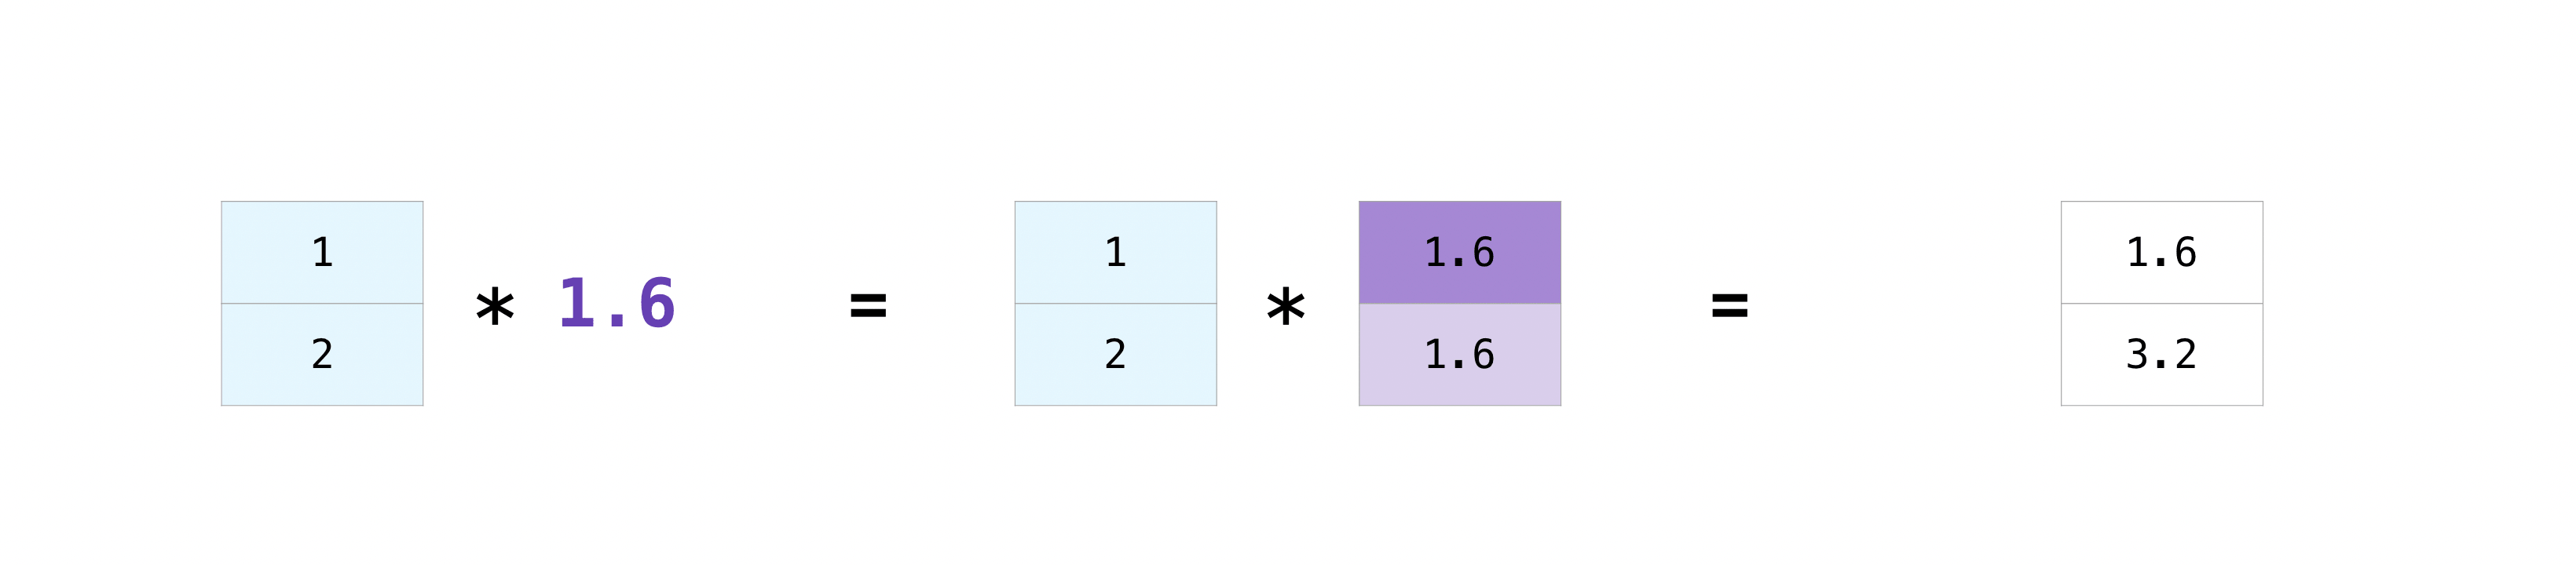

NumPy understands that the multiplication should happen with each cell. That concept is called __broadcasting__. Broadcasting is a mechanism that allows NumPy to perform operations on arrays of different shapes. The dimensions of your array must be compatible, for example, when the dimensions of both arrays are equal or when one of them is 1. If the dimensions are not compatible, you will get a `ValueError`.

### More useful array operations

NumPy also performs aggregation functions. In addition to `min`, `max`, and `sum`, you can easily run `mean` to get the average, `prod` to get the result of multiplying the elements together, `std` to get the standard deviation, and more.

In [35]:
print(data.max())

2.0


In [36]:
print(data.min())

1.0


In [37]:
print(data.sum())

3.0
